In [2]:
import pandas as pd
import seaborn as sns


# From https://drive.google.com/file/d/1ayvCVXaCHsXUsn8TDGRiay0v5SKyTRDH/view
df = pd.read_csv(
    "https://drive.google.com/uc?id=1ayvCVXaCHsXUsn8TDGRiay0v5SKyTRDH",
)
df.shape

(801, 41)

In [3]:

pokemon = df[['pokedex_number','name','japanese_name', 'generation','classfication',
                    'is_legendary','abilities','type1','type2','height_m','weight_kg','percentage_male',
                    'base_egg_steps','base_happiness','capture_rate','experience_growth',]]

pokemon_with_stats = df[['pokedex_number','name','japanese_name', 'generation','classfication',
                    'is_legendary','abilities','type1','type2','height_m','weight_kg','percentage_male',
                    'base_egg_steps','base_happiness','capture_rate','experience_growth','hp',
                    'attack', 'defense', 'sp_attack', 'sp_defense','speed', 'base_total']]

In [4]:
pokemon.describe()

,pokedex_number,generation,is_legendary,height_m,weight_kg,percentage_male,base_egg_steps,base_happiness,experience_growth
count,801.000000,801.000000,801.000000,781.000000,781.000000,703.000000,801.000000,801.000000,8.010000e+02
mean,401.000000,3.690387,0.087391,1.163892,61.378105,55.155761,7191.011236,65.362047,1.054996e+06
std,231.373075,1.930420,0.282583,1.080326,109.354766,20.261623,6558.220422,19.598948,1.602558e+05
min,1.000000,1.000000,0.000000,0.100000,0.100000,0.000000,1280.000000,0.000000,6.000000e+05
25%,201.000000,2.000000,0.000000,0.600000,9.000000,50.000000,5120.000000,70.000000,1.000000e+06
50%,401.000000,4.000000,0.000000,1.000000,27.300000,50.000000,5120.000000,70.000000,1.000000e+06
75%,601.000000,5.000000,0.000000,1.500000,64.800000,50.000000,6400.000000,70.000000,1.059860e+06
max,801.000000,7.000000,1.000000,14.500000,999.900000,100.000000,30720.000000,140.000000,1.640000e+06


In [5]:
# hp
pokemon_with_stats.corr().loc['hp'].sort_values(ascending = False)

hp                   1.000000
base_total           0.620624
height_m             0.478369
weight_kg            0.427743
attack               0.410616
sp_defense           0.366971
sp_attack            0.365973
base_egg_steps       0.359218
is_legendary         0.308405
defense              0.242378
experience_growth    0.214068
speed                0.160760
pokedex_number       0.108079
generation           0.074065
percentage_male     -0.059014
base_happiness      -0.108217
Name: hp, dtype: float64

In [6]:
#Question: How does height and weight of a Pokemon correlate with its various base stats?
pokemon_with_stats.corr().loc['height_m'].sort_values(ascending = False)

height_m             1.000000
weight_kg            0.626551
base_total           0.535063
hp                   0.478369
attack               0.423160
base_egg_steps       0.381455
defense              0.361938
sp_attack            0.353007
sp_defense           0.328327
is_legendary         0.322155
experience_growth    0.245984
speed                0.202202
percentage_male      0.040893
pokedex_number       0.008580
generation          -0.025525
base_happiness      -0.343394
Name: height_m, dtype: float64

Height in m is has a positive association with weight in kg.
Height has a negative assiciation with base happiness.
Taller the pokemon, higher the weight. Taller the pokemon less happy they are.


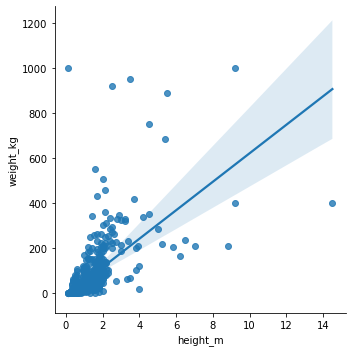

In [7]:
#Question: How does weight variate against height
sns.lmplot(data = pokemon_with_stats, x ="height_m", y = "weight_kg")

print("Height in m is has a positive association with weight in kg.\nHeight has a negative assiciation with base happiness.")
print("Taller the pokemon, higher the weight. Taller the pokemon less happy they are.")


Base total has high positive correlation with, sp_attack,attack, sp_defense,defense, hp and speed.
This makes sense since base total is defined by the sum of these correlated fields.


Legendary pokemon seems to have higher base total in general


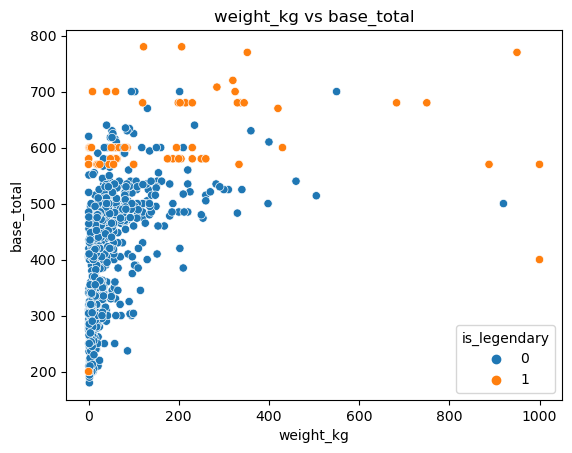

In [8]:
sns.scatterplot(data=pokemon_with_stats, x="weight_kg", y = "base_total",  hue = "is_legendary").set(title="weight_kg vs base_total")
pokemon_with_stats.corr().loc['base_total'].sort_values(ascending = False)
print("\nBase total has high positive correlation with, sp_attack,attack, sp_defense,defense, hp and speed.\nThis makes sense since base total is defined by the sum of these correlated fields.\n")
print("\nLegendary pokemon seems to have higher base total in general")

In [9]:

print("Weight unknown Pokemon:",pokemon_with_stats.weight_kg.isna().sum())
print("Height unknown Pokemon:",pokemon_with_stats.height_m.isna().sum())
# Question: Are the Pokemon with null weight the same pokemon who has null height?
#exploring the null weight/height pokemon
print(pokemon_with_stats.loc[pokemon_with_stats.weight_kg.isna()==True][["name","generation","is_legendary", "pokedex_number"]])
print(pokemon_with_stats.loc[pokemon_with_stats.height_m.isna()==True][["name","generation","is_legendary", "pokedex_number"]])
print("Most of the null weight/height pokemon are from 1st generation and are not legendary pokemon")

Weight unknown Pokemon: 20
Height unknown Pokemon: 20
          name  generation  is_legendary  pokedex_number
18     Rattata           1             0              19
19    Raticate           1             0              20
25      Raichu           1             0              26
26   Sandshrew           1             0              27
27   Sandslash           1             0              28
36      Vulpix           1             0              37
37   Ninetales           1             0              38
49     Diglett           1             0              50
50     Dugtrio           1             0              51
51      Meowth           1             0              52
52     Persian           1             0              53
73     Geodude           1             0              74
74    Graveler           1             0              75
75       Golem           1             0              76
87      Grimer           1             0              88
88         Muk           1        